## Forecasting using Holt-Winters Methods

Simple Exponential Smoothing does not account for trend and seasonality.

Using the <strong>Double Exponential Smoothing</strong> (Holt\'s Method), the new smoothing factor $\beta$ (beta) is able to address trend.

With <strong>Triple Exponential Smoothing</strong> (Holt-Winters Method) a new smoothing factor $\gamma$ (gamma) allows to address seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.


## Forecasting Steps
* Choose a model
* Split data into training and test sets
* Fit model on training set
* Evaluate model on test set
* Fit the model on the entire data set
* Forecast for future data


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
ts = pd.read_csv('./data2.csv', header=0, parse_dates=[0], dayfirst=True, index_col=0)
ts.index
tsr = ts.resample(rule='20T').mean()
tsr

,Value
Time,
2021-01-01 00:20:00,14.590719
2021-01-01 00:40:00,14.603471
2021-01-01 01:00:00,14.121673
2021-01-01 01:20:00,14.458793
2021-01-01 01:40:00,14.256841
...,...
2021-02-05 02:00:00,28.118306
2021-02-05 02:20:00,27.848629
2021-02-05 02:40:00,27.621854


In [18]:
#Split training and test data (80/20% 0r 90/10)
train_data = tsr.iloc[:2024]
test_data = tsr.iloc[2024:]

In [43]:
test_data

,Value
Time,
2021-01-29 03:00:00,16.439323
2021-01-29 03:20:00,16.720620
2021-01-29 03:40:00,16.228713
2021-01-29 04:00:00,16.261521
2021-01-29 04:20:00,16.623307
...,...
2021-02-05 02:00:00,28.118306
2021-02-05 02:20:00,27.848629
2021-02-05 02:40:00,27.621854


In [19]:
#import exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
tsmodel = ExponentialSmoothing(train_data, trend='add', seasonal='add',seasonal_periods=320).fit()

In [20]:
#forecast (check 320)
prediction = tsmodel.forecast(320)

In [21]:
prediction

2021-01-29 03:00:00    16.489404
2021-01-29 03:20:00    16.512907
2021-01-29 03:40:00    16.509152
2021-01-29 04:00:00    16.506519
2021-01-29 04:20:00    16.567700
                         ...    
2021-02-02 12:00:00    31.298675
2021-02-02 12:20:00    31.342752
2021-02-02 12:40:00    31.504285
2021-02-02 13:00:00    31.437705
2021-02-02 13:20:00    31.410226
Freq: 20T, Length: 320, dtype: float64

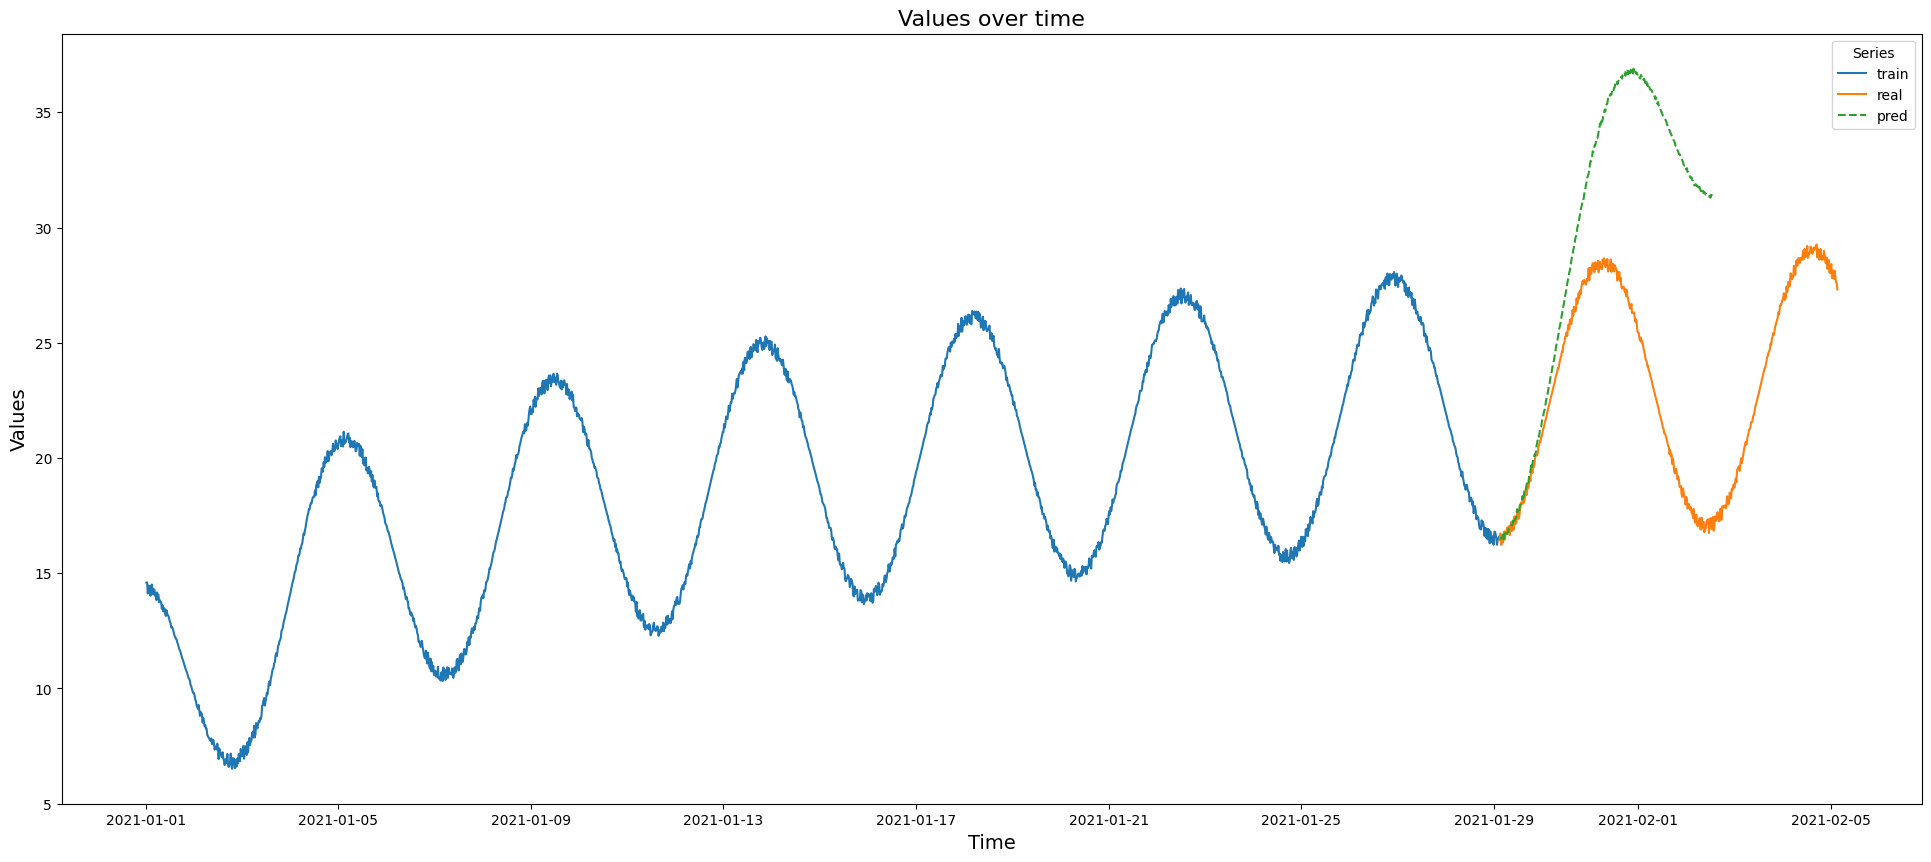

In [5]:
#define size
plt.figure(figsize=(24,10))
#add axes labels and a title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)

plt.plot(train_data, "-", label = 'train')
plt.plot(test_data,"-",label = 'real')
plt.plot(prediction,"--",label = 'pred')
#add legend
plt.legend(title='Series')


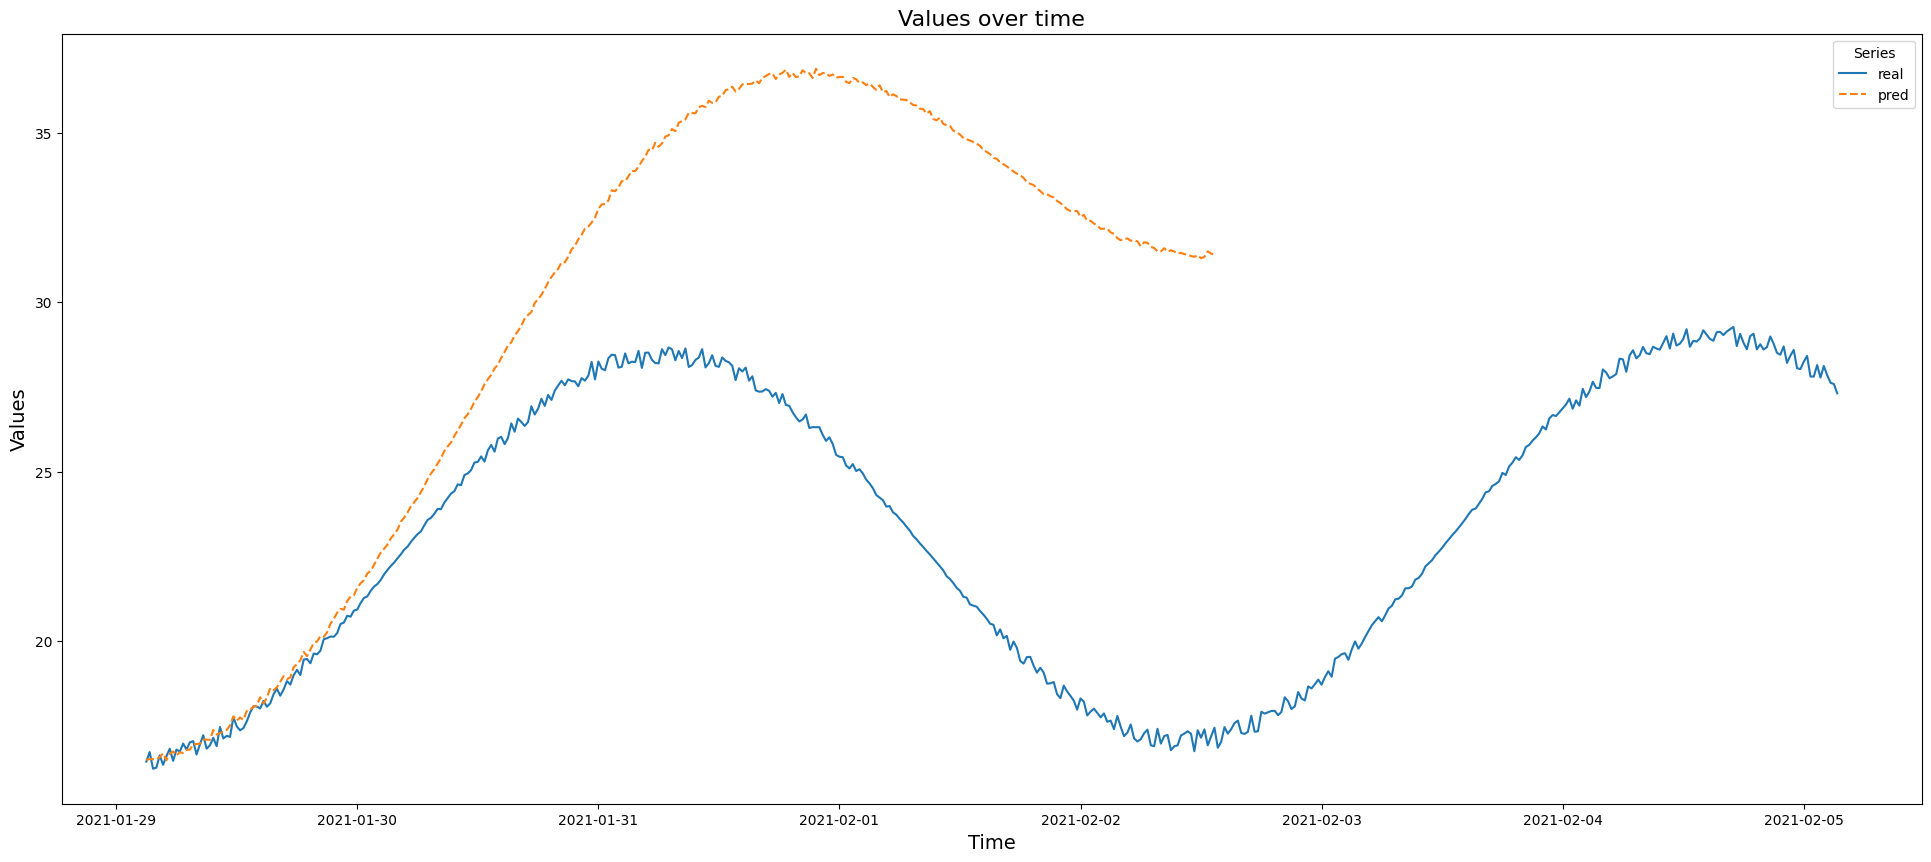

In [22]:
#define size
plt.figure(figsize=(24,10))
#add axes labels and a title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(test_data,"-",label = 'real')
plt.plot(prediction,"--",label = 'pred')
#add legend
plt.legend(title='Series')

In [7]:
tsmodel = ExponentialSmoothing(train_data, trend='add', seasonal='mul',seasonal_periods=320).fit()

/Users/gmorana/PycharmProjects/pythonProject1/venv/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [8]:
prediction_mul = tsmodel.forecast(506)

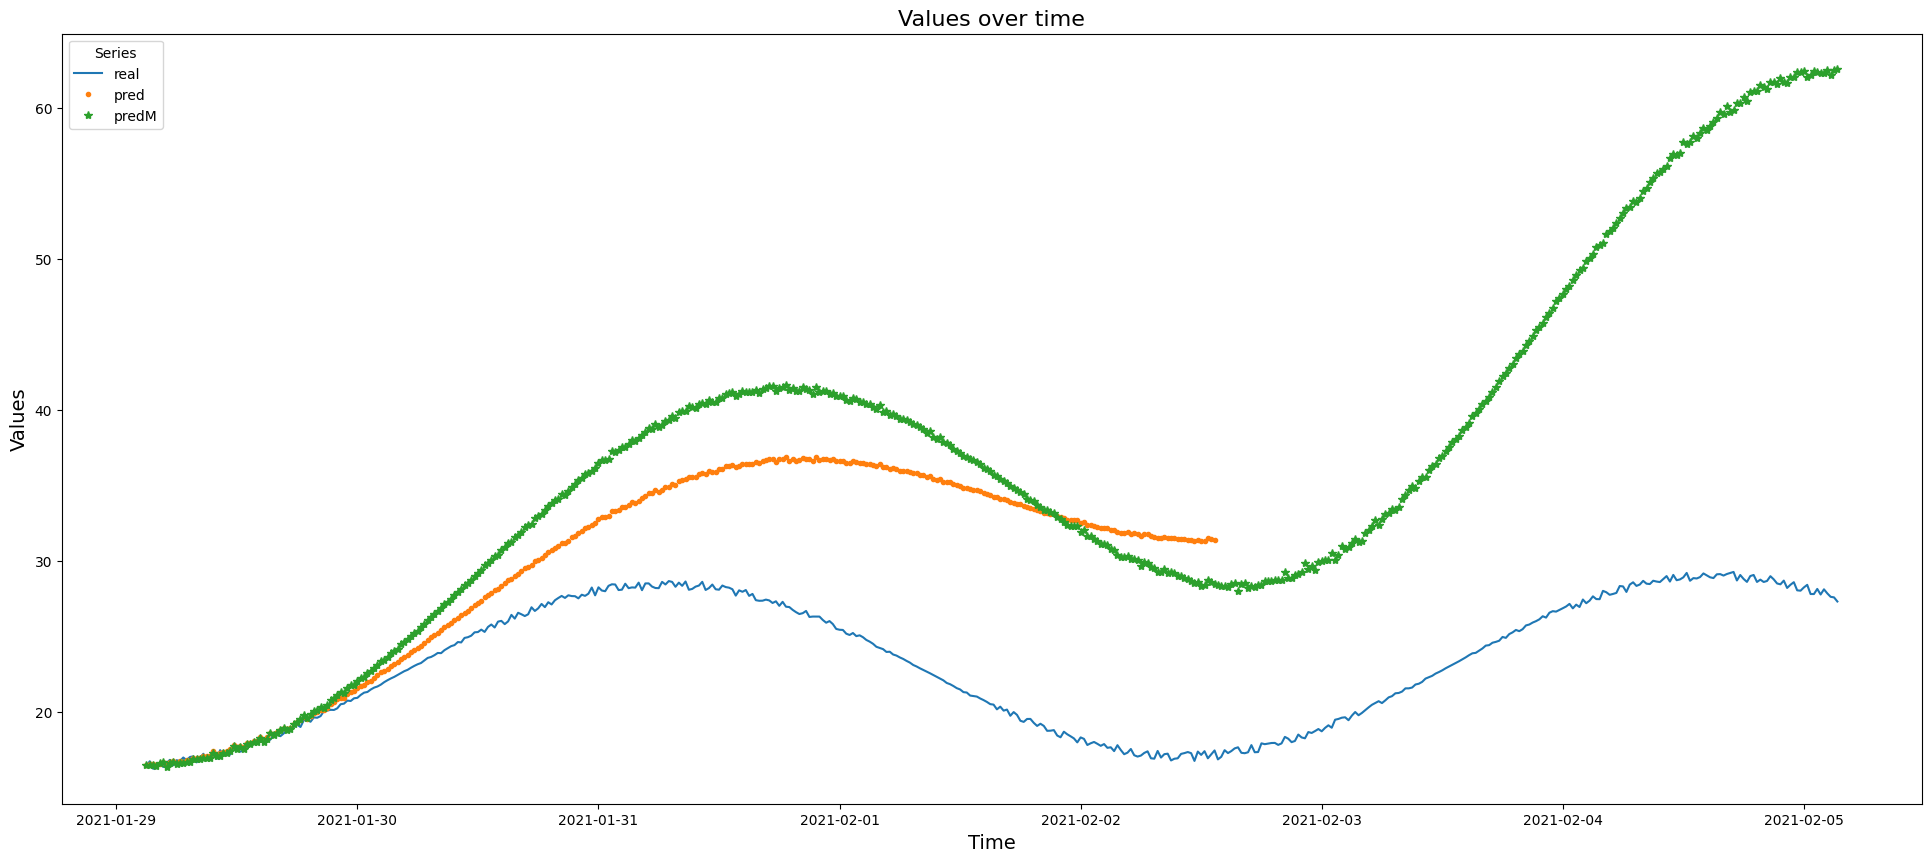

In [9]:
#define size
plt.figure(figsize=(24,10))
#add axes labels and a title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(test_data,"-",label = 'real')
plt.plot(prediction,".",label = 'pred')
plt.plot(prediction_mul,"*",label = 'predM')
#add legend
plt.legend(title='Series')

### Evaluate predictions

We need a way to evaluate error.
* Mean Absolute Error
* Mean Square Error
* Root Mean Square Error

-> To be compared with the STD of target values

In [10]:
#import needed libs
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_absolute_error(test_data.iloc[:320],prediction_mul[:320])

8.826031748910395

In [11]:
mean_squared_error(test_data.iloc[:320],prediction_mul[:320])

113.42170542714712

In [12]:
import numpy as np
np.sqrt(mean_squared_error(test_data.iloc[:320],prediction_mul[:320]))

10.649962696044861

In [60]:
test_data.describe() #to get std value

,Value
count,506.000000
mean,23.217630
std,4.287008
min,16.228713
25%,18.877934
50%,23.589259
75%,27.576982
max,29.271301


In [13]:
mean_absolute_error(test_data.iloc[:30],prediction_mul[:30])

0.1818205698391054

In [14]:
mean_absolute_error(test_data.iloc[:100],prediction_mul[:100])

1.0533995785588581

In [15]:
mean_absolute_error(test_data.iloc[:72],prediction_mul[:72])

0.4188867787812367

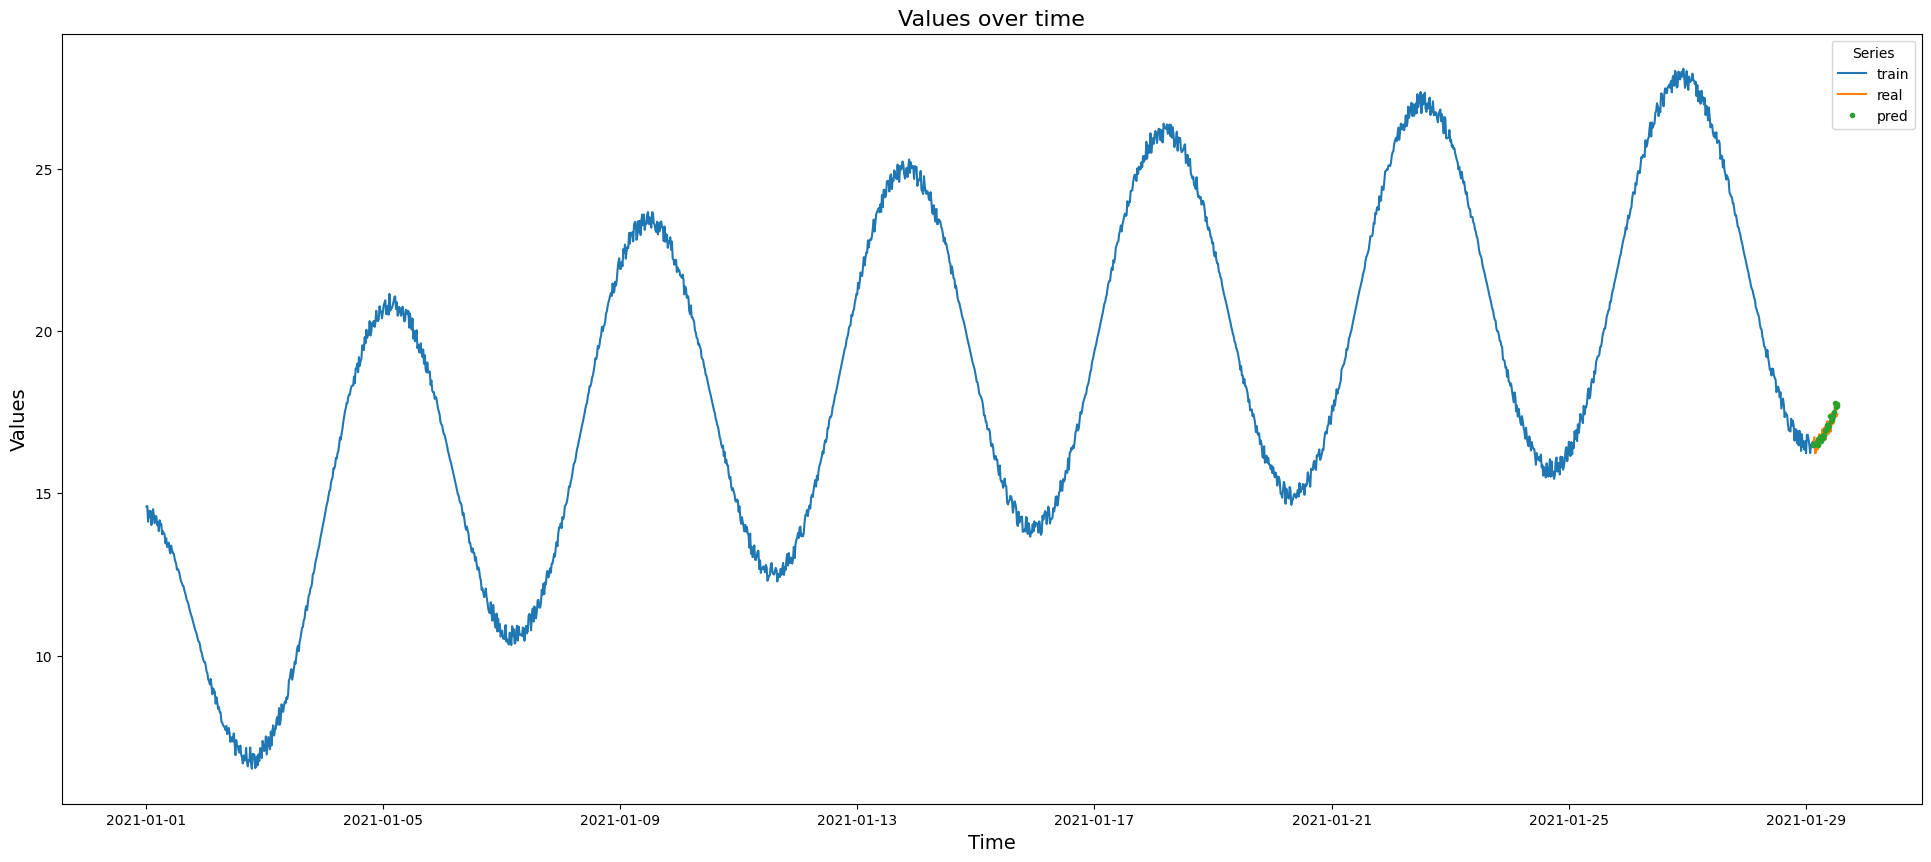

In [23]:
#LAST CHECK define size
plt.figure(figsize=(24,10))
#add axes labels and a title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)

plt.plot(train_data, "-", label = 'train')
plt.plot(test_data.iloc[:30],"-",label = 'real')
plt.plot(prediction.iloc[:30],".",label = 'pred')
#add legend
plt.legend(title='Series')